In [1]:
# Ensemle Learning on CNN Model-1 and 2

import warnings
warnings.simplefilter('ignore')

In [2]:
from model_1 import *
from model_1 import Net1
from model_2 import *
from model_2 import Net2

In [3]:
# Training parameter
num_epochs = 3           
batch_size = 16           
seed = np.random.seed(1234) 

In [4]:
use_cuda = torch.cuda.is_available()

if use_cuda:
    computing_device = torch.device("cuda")
    extras = {"num_workers": 1, "pin_memory": True}
    print("CUDA is supported")
else: 
    computing_device = torch.device("cpu")
    extras = False
    print("CUDA NOT supported")

CUDA is supported


In [5]:
transform = transforms.Compose([transforms.Resize(512), transforms.ToTensor()])
train_loader, val_loader, test_loader = create_split_loaders(batch_size, seed, transform = transform, 
                                                             p_val = 0.1, p_test = 0.2,
                                                             shuffle = True, show_sample = False, 
                                                             extras = extras)

In [6]:
from loss import *

model_1 = Net1()
model_1 = model_1.to(computing_device)

model_2 = Net2()
model_2 = model_2.to(computing_device)

criterion = weighted_focal_loss()

In [8]:
# Hyperparameter tuning on the validation set

losses = []
for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
    print("\nLearning Rate: ", learning_rate)
    optimizer1 = optim.Adam(model_1.parameters(), lr = learning_rate)
    optimizer2 = optim.Adam(model_2.parameters(), lr = learning_rate)
    total_loss = []
    avg_minibatch_loss = []
    epochs = 2
    for epoch in range(epochs):
        N = 25
        N_minibatch_loss = 0.0 
        for minibatch_count, (images, labels) in enumerate(val_loader, 0):

            images, labels = images.to(computing_device), labels.to(computing_device)
            optimizer1.zero_grad()
            outputs_1 = model_1(images) # forward pass
            loss1 = criterion(outputs_1, labels) # compute loss
            loss1.backward() # backprop
            optimizer1.step() # weight update
            
            optimizer2.zero_grad()
            outputs_2 = model_2(images) # forward pass
            loss2 = criterion(outputs_2, labels) # compute loss
            loss2.backward() # backprop
            optimizer2.step() # weight update
            
            outputs = (outputs_1 + outputs_2)/2

            total_loss.append(loss1.item())
            N_minibatch_loss += (loss1 + loss2)/2

            if (minibatch_count + 1) % N == 0:      
                N_minibatch_loss /= N
                print('Epoch: %d ! Average minibatch %d loss: %.3f' %
                    (epoch + 1, minibatch_count + 1, N_minibatch_loss))
                avg_minibatch_loss.append(N_minibatch_loss)
                N_minibatch_loss = 0.0

    losses.append(avg_minibatch_loss)    


Learning Rate:  0.1
Epoch: 1 ! Average minibatch 25 loss: 0.271
Epoch: 1 ! Average minibatch 50 loss: 0.186
Epoch: 1 ! Average minibatch 75 loss: 0.187
Epoch: 1 ! Average minibatch 100 loss: 0.174
Epoch: 1 ! Average minibatch 125 loss: 0.165
Epoch: 2 ! Average minibatch 25 loss: 0.173
Epoch: 2 ! Average minibatch 50 loss: 0.175
Epoch: 2 ! Average minibatch 75 loss: 0.184
Epoch: 2 ! Average minibatch 100 loss: 0.175
Epoch: 2 ! Average minibatch 125 loss: 0.169

Learning Rate:  0.01
Epoch: 1 ! Average minibatch 25 loss: 0.180
Epoch: 1 ! Average minibatch 50 loss: 0.160
Epoch: 1 ! Average minibatch 75 loss: 0.150
Epoch: 1 ! Average minibatch 100 loss: 0.173
Epoch: 1 ! Average minibatch 125 loss: 0.171
Epoch: 2 ! Average minibatch 25 loss: 0.159
Epoch: 2 ! Average minibatch 50 loss: 0.166
Epoch: 2 ! Average minibatch 75 loss: 0.170
Epoch: 2 ! Average minibatch 100 loss: 0.147
Epoch: 2 ! Average minibatch 125 loss: 0.174

Learning Rate:  0.001
Epoch: 1 ! Average minibatch 25 loss: 0.155
Ep

In [9]:
losses = []
for weight_decay in [0.01, 0.001, 0.0001, 0.00001]:
    print("\nRegularization Strength: ", weight_decay)
    optimizer1 = optim.Adam(model_1.parameters(), lr = 0.001, weight_decay = weight_decay)
    optimizer2 = optim.Adam(model_2.parameters(), lr = 0.001, weight_decay = weight_decay)
    total_loss = []
    avg_minibatch_loss = []
    epochs = 2
    for epoch in range(epochs):
        N = 25
        N_minibatch_loss = 0.0 
        for minibatch_count, (images, labels) in enumerate(val_loader, 0):

            images, labels = images.to(computing_device), labels.to(computing_device)
            optimizer1.zero_grad()
            outputs_1 = model_1(images) # forward pass
            loss1 = criterion(outputs_1, labels) # compute loss
            loss1.backward() # backprop
            optimizer1.step() # weight update
            
            optimizer2.zero_grad()
            outputs_2 = model_2(images) # forward pass
            loss2 = criterion(outputs_2, labels) # compute loss
            loss2.backward() # backprop
            optimizer2.step() # weight update
            
            outputs = (outputs_1 + outputs_2)/2

            total_loss.append(loss1.item())
            N_minibatch_loss += (loss1 + loss2)/2

            if (minibatch_count + 1) % N == 0:      
                N_minibatch_loss /= N
                print('Epoch: %d ! Average minibatch %d loss: %.3f' %
                    (epoch + 1, minibatch_count + 1, N_minibatch_loss))
                avg_minibatch_loss.append(N_minibatch_loss)
                N_minibatch_loss = 0.0

    losses.append(avg_minibatch_loss)   


Regularization Strength:  0.01
Epoch: 1 ! Average minibatch 25 loss: 0.152
Epoch: 1 ! Average minibatch 50 loss: 0.149
Epoch: 1 ! Average minibatch 75 loss: 0.167
Epoch: 1 ! Average minibatch 100 loss: 0.159
Epoch: 1 ! Average minibatch 125 loss: 0.166
Epoch: 2 ! Average minibatch 25 loss: 0.149
Epoch: 2 ! Average minibatch 50 loss: 0.166
Epoch: 2 ! Average minibatch 75 loss: 0.169
Epoch: 2 ! Average minibatch 100 loss: 0.164
Epoch: 2 ! Average minibatch 125 loss: 0.168

Regularization Strength:  0.001
Epoch: 1 ! Average minibatch 25 loss: 0.167
Epoch: 1 ! Average minibatch 50 loss: 0.173
Epoch: 1 ! Average minibatch 75 loss: 0.161
Epoch: 1 ! Average minibatch 100 loss: 0.166
Epoch: 1 ! Average minibatch 125 loss: 0.148
Epoch: 2 ! Average minibatch 25 loss: 0.173
Epoch: 2 ! Average minibatch 50 loss: 0.160
Epoch: 2 ! Average minibatch 75 loss: 0.157
Epoch: 2 ! Average minibatch 100 loss: 0.153
Epoch: 2 ! Average minibatch 125 loss: 0.165

Regularization Strength:  0.0001
Epoch: 1 ! Av

In [10]:
# Training with best hyperparameters

total_loss = []
avg_minibatch_loss = []
optimizer1 = optim.Adam(model_1.parameters(), lr = 0.001, weight_decay = 0.00001)
optimizer2 = optim.Adam(model_2.parameters(), lr = 0.001, weight_decay = 0.00001)

for epoch in range(num_epochs):
    N = 50
    N_minibatch_loss = 0.0 
    for minibatch_count, (images, labels) in enumerate(train_loader, 0):

        images, labels = images.to(computing_device), labels.to(computing_device)
        optimizer1.zero_grad()
        outputs_1 = model_1(images) # forward pass
        loss1 = criterion(outputs_1, labels) # compute loss
        loss1.backward() # backprop
        optimizer1.step() # weight update
            
        optimizer2.zero_grad()
        outputs_2 = model_2(images) # forward pass
        loss2 = criterion(outputs_2, labels) # compute loss
        loss2.backward() # backprop
        optimizer2.step() # weight update
            
        outputs = (outputs_1 + outputs_2)/2

        total_loss.append(loss1.item())
        N_minibatch_loss += (loss1 + loss2)/2
        
        if (minibatch_count + 1) % N == 0:      
            N_minibatch_loss /= N
            print('Epoch: %d ! Average minibatch %d loss: %.3f' %
                (epoch + 1, minibatch_count + 1, N_minibatch_loss))
            avg_minibatch_loss.append(N_minibatch_loss)
            N_minibatch_loss = 0.0

    print("Finished", epoch + 1, "epochs of training")
print("Training complete after", epoch + 1, "epochs")

Epoch: 1 ! Average minibatch 50 loss: 0.171
Epoch: 1 ! Average minibatch 100 loss: 0.164
Epoch: 1 ! Average minibatch 150 loss: 0.167
Epoch: 1 ! Average minibatch 200 loss: 0.170
Epoch: 1 ! Average minibatch 250 loss: 0.155
Epoch: 1 ! Average minibatch 300 loss: 0.169
Epoch: 1 ! Average minibatch 350 loss: 0.159
Epoch: 1 ! Average minibatch 400 loss: 0.156
Epoch: 1 ! Average minibatch 450 loss: 0.151
Epoch: 1 ! Average minibatch 500 loss: 0.157
Epoch: 1 ! Average minibatch 550 loss: 0.158
Epoch: 1 ! Average minibatch 600 loss: 0.163
Epoch: 1 ! Average minibatch 650 loss: 0.152
Epoch: 1 ! Average minibatch 700 loss: 0.160
Epoch: 1 ! Average minibatch 750 loss: 0.160
Epoch: 1 ! Average minibatch 800 loss: 0.160
Epoch: 1 ! Average minibatch 850 loss: 0.149
Epoch: 1 ! Average minibatch 900 loss: 0.162
Epoch: 1 ! Average minibatch 950 loss: 0.172
Epoch: 1 ! Average minibatch 1000 loss: 0.173
Finished 1 epochs of training
Epoch: 2 ! Average minibatch 50 loss: 0.163
Epoch: 2 ! Average minibat

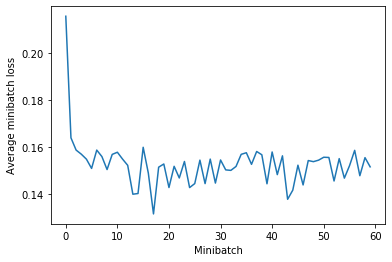

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.ylabel('Average minibatch loss')
plt.xlabel('Minibatch')
plt.plot(avg_minibatch_loss)
plt.savefig('Plots/model_3_loss.png')
plt.show()

In [63]:
from test import *
from test import Test_Model

In [65]:
# Test the model

labels_all = []
predictions_all = []
model_1.eval()
model_2.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(computing_device), labels.to(computing_device)
        labels_all.append(labels)
        output1 = model_1(images)
        output2 = model_2(images)
        predictions = (output1 + output2)/2 > 0.5
        predictions_all.append(predictions)

labels = torch.cat(labels_all, 0)
predctions = torch.cat(predictions_all, 0)
test_res = Test_Model(predctions.float(), labels)
accuracy = test_res.avg_accuracy().item()
precision = test_res.avg_precision().item()
recall = test_res.avg_recall().item()
BCR = test_res.avg_BCR().item()

In [70]:
print("Test Statistics: ")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("BCR: ", BCR)

Test Statistics: 
Accuracy:  0.6955
Precision:  0.3819
Recall:  0.4279
BCR:  0.4049
